# 0. Download dataset

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|██████████| 1.47M/1.47M [00:00<00:00, 1.97MB/s]

Extracting files...
Path to dataset files: C:\Users\shini\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [12]:
import shutil

shutil.move(path, "./")

'./3'

# 1. Preview Dataset

In [13]:
import pandas as pd

books = pd.read_csv("./dataset/Books.csv")


In [15]:
books


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0


In [17]:
for col in list(books.columns):
    print(f"Number of NaN rows in {col}: {books[col].isna().sum()} / {len(books)} = {books[col].isna().sum()/len(books)*100:.2f}%")

Number of NaN rows in isbn13: 0 / 6810 = 0.00%
Number of NaN rows in isbn10: 0 / 6810 = 0.00%
Number of NaN rows in title: 0 / 6810 = 0.00%
Number of NaN rows in subtitle: 4429 / 6810 = 65.04%
Number of NaN rows in authors: 72 / 6810 = 1.06%
Number of NaN rows in categories: 99 / 6810 = 1.45%
Number of NaN rows in thumbnail: 329 / 6810 = 4.83%
Number of NaN rows in description: 262 / 6810 = 3.85%
Number of NaN rows in published_year: 6 / 6810 = 0.09%
Number of NaN rows in average_rating: 43 / 6810 = 0.63%
Number of NaN rows in num_pages: 43 / 6810 = 0.63%
Number of NaN rows in ratings_count: 43 / 6810 = 0.63%


Remove all NaN Description rows, because without description, we cannot retrieve any information from the vector database. Besides, it is lower then 5% of the whole dataset


In [19]:
books = books[~books["description"].isna()].reset_index(drop=True)

Try to clear books with very short description

In [20]:
books["description_words_count"] = books["description"].str.split(" ").str.len() + 1

Truncated: 295/6548 = 4.51%
One example with 14 words:
['Donation.', 'Fantasy-roman.', "Koko is Peter Straub's foray into the psychological horror of the Vietnam War.", 'A matter of life and death - and the Throne of England', 'Nonsense rhyming story. 4 yrs+', "A study guide for the novel There's a Boy in the Girl's bathroom.", "Forty-nine stories reflect much of the intensity of Hemingway's own life and environment", 'Library of Liberal Arts title.', 'Originally published: [New York]: Clarion Books, 1994.', 'Presents three stories of teenagers beset by horrible curses and strange powers.', "A stunning collection of Annie Dillard's most popular books in one volume.", "The most eloquent translation of Homer's Odyssey into modern English.", 'A New York City chef and author of Gone Bamboo recounts his', 'A study of the influence Romanticism exerts upon Western culture.', 'Storties included: The Visor, The Great Switcheroo, The Last Act, Bitch.', 'After the war Irish emigre Darley becomes 

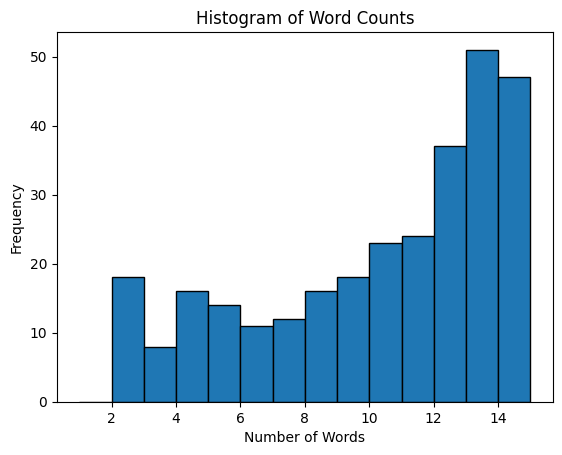

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

threshold = 15
truncated_books = books[books["description_words_count"] < threshold].reset_index(drop=True)
print(f"Truncated: {len(truncated_books)}/{len(books)} = {len(truncated_books)/len(books)*100:.2f}%")
print(f"One example with {threshold-1} words:")
print(books[books["description_words_count"] < threshold]["description"].to_list())
fig, ax = plt.subplots()
plt.hist(truncated_books["description_words_count"], bins=range(1, threshold+1), edgecolor='black')
plt.title('Histogram of Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Now truncate all rows with Description smaller than 17 words

In [29]:
threshold = 15
books = books[books["description_words_count"] >= threshold].reset_index(drop=True)


In [30]:
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,description_words_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,200
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,206
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,15
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,58
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6248,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,64
6249,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,118
6250,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,175
6251,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,246


In [58]:
books[books["Predicted_Category"].isin(["Fiction", "Non-Fiction"])]["Predicted_Category"].unique()

array(['Fiction', 'Non-Fiction', 'Children Non-Fiction',
       'Children Fiction'], dtype=object)

Concatenate Description with ISBN13 for later ease of retrieval

In [33]:
books["description"] = books["isbn13"].astype(str) + " " + books["description"]

# 2. Clean Category column

In [35]:
books["categories"] = books["categories"].fillna("")

Now we use bart-large-mnli model to do zero-shot classification task

In [39]:
from transformers import pipeline
from tqdm import tqdm

classifier = pipeline("zero-shot-classification",
                      model="facebook/bart-large-mnli",
                      device=0)
candidate_labels = ['Children Fiction', 'Children Non-Fiction', 'Fiction', 'Non-Fiction']#'Horror', 'Mystery', "Fantasy", "Romance", "Thriller", "Kids", "Classics", "History"]

books["Predicted_Category"] = ""

for index, row in tqdm(books.iterrows(), desc="Re-classify Categories", total=len(books)):
    category = row['categories'] if row['categories']!="" else "None"
    description = row['description']
    sequence = f"Recommended category: {category}\nDescription: {description}"
    result = classifier(sequence, candidate_labels)
    books.loc[index, "Predicted_Category"] = result["labels"][0]


Device set to use cuda:0
Re-classify Categories: 100%|██████████| 6253/6253 [21:05<00:00,  4.94it/s]


# 3. Create Tone column for the Dataframe

In [40]:
from transformers import pipeline
classifier = pipeline("text-classification",
                      model="j-hartmann/emotion-english-distilroberta-base",
                      top_k=None,
                      device=0)
classifier("I love this!")


Device set to use cuda:0
D:\Documents\Personal Projects\Book_Recommender\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


[[{'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'surprise', 'score': 0.00852868054062128},
  {'label': 'neutral', 'score': 0.005764597095549107},
  {'label': 'anger', 'score': 0.004419783595949411},
  {'label': 'sadness', 'score': 0.002092392183840275},
  {'label': 'disgust', 'score': 0.001611993182450533},
  {'label': 'fear', 'score': 0.0004138521908316761}]]

In [41]:
def classify_emotion(text):
    predictions = classifier(text)[0]
    label = None
    score = 0
    for pred in predictions:
        if pred['score'] > score:
            label = pred['label']
            score = pred['score']
    return label, score

In [42]:
def classify_paragraph(paragraph):
    texts = paragraph.split(".")
    emotions = {
        "joy": [],
        "surprise": [],
        "neutral": [],
        "anger": [],
        "sadness": [],
        "disgust": [],
        "fear": [],
    }
    predictions = classifier(texts)
    for pred in predictions:
        for emo in pred:
            emotions[emo['label']].append(emo['score'])

    # Just take the maximum score from each emotion
    for key in emotions.keys():
        emotions[key] = max(emotions[key])

    return emotions

In [43]:
paragraph = "Today I have a date with my crush. However, it is suddenly rainy and I forgot my umbrella at home. Hence, my make-up is gone. Luckily, my crush didn't attend but complimented me on my beauty. I was so happy. We had a greate date."
emotions = classify_paragraph(paragraph)
emotions

{'joy': 0.9622989296913147,
 'surprise': 0.8765355944633484,
 'neutral': 0.5494765639305115,
 'anger': 0.0641336739063263,
 'sadness': 0.6758178472518921,
 'disgust': 0.10400670021772385,
 'fear': 0.051362842321395874}

In [44]:
for sentence in paragraph.split("."):
    label, score = classify_emotion(sentence)
    print(f"{sentence}: {label}, {score}")

Today I have a date with my crush: joy, 0.894727885723114
 However, it is suddenly rainy and I forgot my umbrella at home: surprise, 0.8765355944633484
 Hence, my make-up is gone: sadness, 0.6345243453979492
 Luckily, my crush didn't attend but complimented me on my beauty: sadness, 0.6758178472518921
 I was so happy: joy, 0.9622989296913147
 We had a greate date: joy, 0.5172947645187378
: neutral, 0.5494765639305115


In [45]:
from tqdm import tqdm

emotions = ["joy", "surprise", "neutral", "anger", "sadness", "disgust", "fear"]
for emotion in emotions:
    books[emotion] = 0

for index, row in tqdm(books.iterrows(), desc="Classify Description's Emotion", total=len(books)):
    description = row['description']
    emotions = classify_paragraph(paragraph)
    for emotion, score in emotions.items():
        books.loc[index, emotion] = score

Classify Description's Emotion:   0%|          | 0/6253 [00:00<?, ?it/s]D:\Documents\Personal Projects\Book_Recommender\.venv\lib\site-packages\torch\nn\modules\module.py:1762: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)
C:\Users\shini\AppData\Local\Temp\ipykernel_21784\955361299.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9622989296913147' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  books.loc[index, emotion] = score
C:\Users\shini\AppData\Local\Temp\ipykernel_21784\955361299.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8765355944633484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  books.lo

# 4 Concatenate Title and Subtitle

In [50]:
books["subtitle"] = books["subtitle"].fillna("")
for index, row in tqdm(books.iterrows(), desc="Update Titles", total=len(books)):
    if row["subtitle"] != "":
        books.loc[index, "title"] = row["title"] + ": " + row["subtitle"]

Update Titles: 100%|██████████| 6253/6253 [00:00<00:00, 7920.01it/s]


# 5. SAVING

### Saving the whole dataframe

In [63]:
books.to_csv(path_or_buf="dataset/BooksCleaned.csv", index=False)

### Saving Description column for RAG

In [53]:
import csv
books['description'].to_csv(path_or_buf="dataset/BooksDescription.txt",
                            sep="\n",
                            index=False,
                            header=False,
                            quoting=csv.QUOTE_NONE)